In [1]:
# just to practice

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [10]:
# LOADING DATA FROM CVS FILE

dataset = pd.read_csv("dataset.csv") # read the dataset from csv file

x_train = np.array(dataset.iloc[:, :4])
y_train = np.array(dataset.iloc[:, 4:])

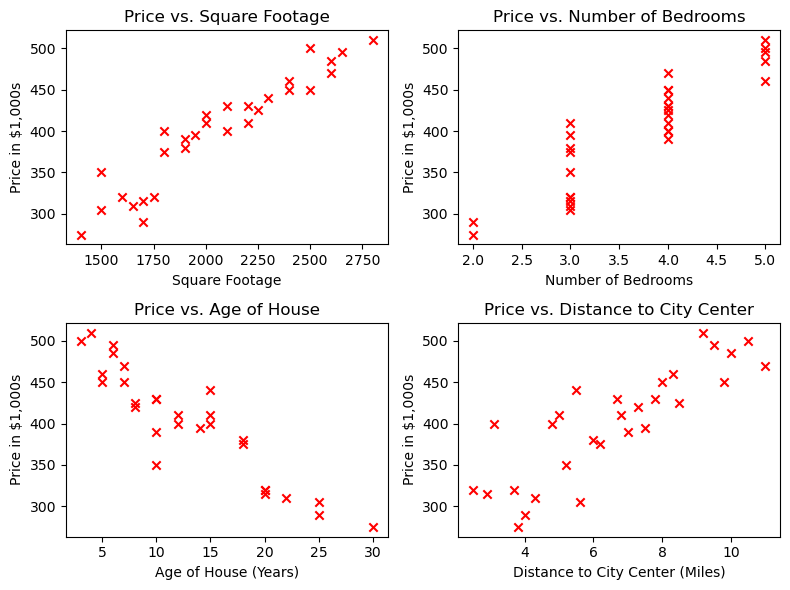

In [11]:
# SOME VISUALIZATIONS

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # Adjust the figsize as needed

# First subplot: Price vs. Square Footage
axs[0, 0].scatter(x_train[:, :1], y_train, marker='x', c='r')
axs[0, 0].set_title("Price vs. Square Footage")
axs[0, 0].set_ylabel('Price in $1,000s')
axs[0, 0].set_xlabel('Square Footage')

# Second subplot: Price vs. Number of Bedrooms
axs[0, 1].scatter(x_train[:, 1:2], y_train, marker='x', c='r')
axs[0, 1].set_title("Price vs. Number of Bedrooms")
axs[0, 1].set_ylabel('Price in $1,000s')
axs[0, 1].set_xlabel('Number of Bedrooms')

# Third subplot: Price vs. Age of House
axs[1, 0].scatter(x_train[:, 2:3], y_train, marker='x', c='r')
axs[1, 0].set_title("Price vs. Age of House")
axs[1, 0].set_ylabel('Price in $1,000s')
axs[1, 0].set_xlabel('Age of House (Years)')

# Fourth subplot: Price vs. Distance to City Center
axs[1, 1].scatter(x_train[:, 3:], y_train, marker='x', c='r')
axs[1, 1].set_title("Price vs. Distance to City Center")
axs[1, 1].set_ylabel('Price in $1,000s')
axs[1, 1].set_xlabel('Distance to City Center (Miles)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Squared error cost function - $J(\mathbf{w},b)$:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
where:
$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$$ 

In [12]:
# COST FUNCTION
def compute_cost(x, y, w, b):
    m = x.shape[0] # take the number of rows (features)
    cost = 0
    for i in range(m):
        f_xi = np.dot(x[i], w) + b
        cost += (f_xi - y[i,0])**2
        # even y being just a single column, it is needed to explicity especify the column '0': y[i,0], not just y[i]
    
    cost = cost/(2*m)
    return cost

Gradient descent algorithm:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}\; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$
Where:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$$ 
$$\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}
$$\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
$$


In [13]:
# GRADIENT FUNCTION
def compute_gradient(x, y, w, b):
    m,n = x.shape # 'm' rows and 'n' columns

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        f_xi = np.dot(x[i], w) + b
        diff = f_xi - y[i,0]
        for j in range(n):
            dj_dw[j] += diff*x[i, j]
        dj_db += diff

    dj_db = dj_db/m
    dj_dw = dj_dw/m

    return dj_db, dj_dw

In [14]:
def gradient_descent(x_train, y_train, w_0, b_0, learning_rate, num_iters):
    j_history = []
    w = copy.deepcopy(w_0)
    b = b_0
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(x_train, y_train, w, b)
        b -= learning_rate*dj_db
        w -= learning_rate*dj_dw

        j_history.append(compute_cost(x_train, y_train, w, b))

    return w, b, j_history

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
Where $j$ selects a feature or a column in the matrix.
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

In [15]:
# ZSCORE NORMALIZATION
def zscore_normalize_features(X):
    m, n = X.shape
    
    print('Ranges before normalization:')
    for i in range(n):
        print(f'[{min(X[:,i])}, {max(X[:,i])}]') 
    
    # find the mean of each column/feature
    mu = np.mean(X, axis=0) # 'axis=0' is to compute the mean of columns, if it was 1, it would compute the mean of rows
    
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0) # sigma will have shape (n,)

    X_norm = (X - mu) / sigma

    print('Ranges after normalization:')
    for i in range(n):
        print(f'[{min(X_norm[:,i]):.05f}, {max(X_norm[:,i]):.05f}]') 

    return (X_norm, mu, sigma)

In [16]:
w = np.zeros(x_train.shape[1])
b = 100
num_iters = 100000
learning_rate = 1e-2

x_train_norm, mu, sigma = zscore_normalize_features(x_train)
w, b, j_hist = gradient_descent(x_train_norm, y_train, w, b, learning_rate, num_iters)
print(f'\n------\n')
print(f'Initial cost: {max(j_hist):.02f}. Final cost: {min(j_hist):.02f}.')

Ranges before normalization:
[1400.0, 2800.0]
[2.0, 5.0]
[3.0, 30.0]
[2.5, 11.0]
Ranges after normalization:
[-1.72761, 1.93510]
[-2.02417, 1.56977]
[-1.43645, 2.40225]
[-1.70864, 1.86068]

------

Initial cost: 46222.32. Final cost: 88.49.


(150.0, 1000.0)

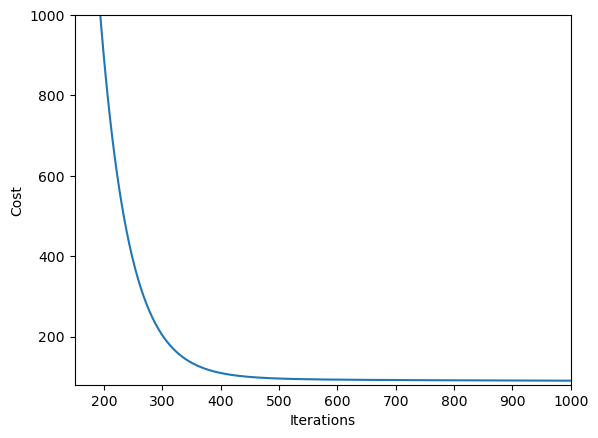

In [21]:
# COST VISUALIZATIONS
plt.plot(j_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.ylim(80, 1000)
plt.xlim(150,1000)